# Machine Learning

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import matplotlib.font_manager as fm
import matplotlib

In [37]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

In [38]:
# matplotlib.rcParams['font.family'] = 'AppleGothic'

In [39]:
import warnings
warnings.filterwarnings('ignore')

---

# EDA 과정에서 한 데이터 정제

In [40]:
df = pd.read_csv('./data/cancer_patient_data_sets.csv')

In [41]:
# 상대적으로 연관이 없는 컬럼 삭제하기

filtered_df = df.drop(['index',
            'Patient Id',
            'Gender',
              'Fatigue', 
              'Weight Loss', 
              'Shortness of Breath', 
              'Wheezing', 
              'Swallowing Difficulty', 
              'Clubbing of Finger Nails', 
              'Frequent Cold', 
              'Dry Cough',
              'Snoring'],
              axis=1)

In [42]:
df['Level'] = df['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
filtered_df['Level'] = filtered_df['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

---

## 입력 데이터 타겟 데이터 분리하기

In [43]:
# X = df.drop(['Level'], axis=1)
# y = df['Level']

In [44]:
X = filtered_df.drop(['Level'], axis=1)
y = filtered_df['Level']

In [45]:
X

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood
0,33,2,4,5,4,3,2,2,4,3,2,2,4
1,17,3,1,5,3,4,2,2,2,2,4,2,3
2,35,4,5,6,5,5,4,6,7,2,3,4,8
3,37,7,7,7,7,6,7,7,7,7,7,7,8
4,46,6,8,7,7,7,6,7,7,8,7,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,6,7,7,7,7,6,7,7,7,8,7,7
996,37,6,8,7,7,7,6,7,7,7,8,7,7
997,25,4,5,6,5,5,4,6,7,2,3,4,8
998,18,6,8,7,7,7,6,7,7,8,7,7,9


In [46]:
y

0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64

---

## machine learning 모델 돌리기

### KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# y_pred_train = knn.predict(X_train)
# y_pred_test = knn.predict(X_test)

knn_score_train = knn.score(X_train, y_train)
knn_score_test = knn.score(X_test, y_test)
print(knn_score_train, knn_score_test)

0.9946666666666667 0.984


### Logistic Regression
- 소프트맥스 회귀를 사용해 로지스틱 회귀 확장하기

In [47]:
# from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    # rmse = root_mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')

In [48]:
# 데이터 분리 및 모델 학습 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))
# evaluate_regression(y_test, lr.predict(X_test))

0.8786666666666667 0.832


In [49]:
# 예측
y_pred = lr.predict(X_test)
y_pred

array([3, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 3, 1, 3, 3, 1, 3, 2, 1, 2, 3, 2,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2, 2, 3, 1, 2, 3, 1, 2,
       2, 2, 1, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1,
       1, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 3, 3, 1, 1, 2,
       1, 3, 2, 1, 3, 1, 2, 1, 2, 3, 1, 3, 2, 3, 2, 1, 3, 2, 3, 2, 1, 3,
       3, 3, 3, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 3, 2, 1, 2, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3,
       3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 2, 1, 3,
       3, 2, 3, 1, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 3,
       3, 2, 1, 1, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 1, 3, 1, 2, 2, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 1, 2])

In [50]:
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba, y_pred_proba.sum(axis=1)

(array([[4.01938113e-09, 3.30318542e-08, 9.99999963e-01],
        [3.34892867e-02, 9.64084902e-01, 2.42581181e-03],
        [5.22062924e-01, 4.77937075e-01, 9.21809565e-10],
        [2.64425844e-05, 2.25711209e-02, 9.77402437e-01],
        [1.87810139e-01, 8.12189548e-01, 3.13447925e-07],
        [2.77134587e-02, 9.72283950e-01, 2.59090114e-06],
        [5.56367715e-01, 4.43632284e-01, 1.09183128e-09],
        [4.06577244e-02, 9.59342124e-01, 1.51080701e-07],
        [4.53152891e-01, 5.46847109e-01, 6.47757735e-10],
        [7.36003688e-01, 2.63996301e-01, 1.12596349e-08],
        [9.95264650e-01, 4.73534903e-03, 4.79192676e-10],
        [2.81548650e-09, 5.85465311e-09, 9.99999991e-01],
        [7.49202257e-01, 2.50797731e-01, 1.20831738e-08],
        [3.60824046e-09, 7.94236395e-08, 9.99999917e-01],
        [9.14558268e-07, 1.47923508e-05, 9.99984293e-01],
        [9.25073517e-01, 7.48078324e-02, 1.18650818e-04],
        [9.80618090e-08, 3.41292069e-06, 9.99996489e-01],
        [4.656

In [51]:
# 소프트맥스 직접 계산

W = lr.coef_
B = lr.intercept_

W.shape, B.shape

((3, 13), (3,))

In [52]:
# 결정함수 (선형회귀값 계산)
Z = lr.decision_function(X_test)
Z

array([[-7.14616076e+00, -5.03981633e+00,  1.21859771e+01],
       [-2.44964808e-01,  3.11498897e+00, -2.87002416e+00],
       [ 6.74767478e+00,  6.65936574e+00, -1.34070405e+01],
       [-5.75570959e+00,  9.93741183e-01,  4.76196841e+00],
       [ 3.94633556e+00,  5.41063775e+00, -9.35697331e+00],
       [ 1.90664599e+00,  5.46437572e+00, -7.37102171e+00],
       [ 6.75850568e+00,  6.53207227e+00, -1.32905780e+01],
       [ 3.11394211e+00,  6.27500104e+00, -9.38894315e+00],
       [ 6.72601299e+00,  6.91395267e+00, -1.36399657e+01],
       [ 6.34027384e+00,  5.31497380e+00, -1.16552476e+01],
       [ 8.93404167e+00,  3.58608842e+00, -1.25201301e+01],
       [-6.80674414e+00, -6.07464247e+00,  1.28813866e+01],
       [ 6.34568929e+00,  5.25132707e+00, -1.15970164e+01],
       [-7.51054044e+00, -4.41896463e+00,  1.19295051e+01],
       [-5.56274442e+00, -2.77932011e+00,  8.34206453e+00],
       [ 3.82546474e+00,  1.31051412e+00, -5.13597887e+00],
       [-6.56246336e+00, -3.01273763e+00

In [53]:
# softmax 함수
def softmax(z):
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
    return exp_z / sum_exp_z

In [54]:
y_pred_proba = softmax(Z)
y_pred_proba

array([[4.01938113e-09, 3.30318542e-08, 9.99999963e-01],
       [3.34892867e-02, 9.64084902e-01, 2.42581181e-03],
       [5.22062924e-01, 4.77937075e-01, 9.21809565e-10],
       [2.64425844e-05, 2.25711209e-02, 9.77402437e-01],
       [1.87810139e-01, 8.12189548e-01, 3.13447925e-07],
       [2.77134587e-02, 9.72283950e-01, 2.59090114e-06],
       [5.56367715e-01, 4.43632284e-01, 1.09183128e-09],
       [4.06577244e-02, 9.59342124e-01, 1.51080701e-07],
       [4.53152891e-01, 5.46847109e-01, 6.47757735e-10],
       [7.36003688e-01, 2.63996301e-01, 1.12596349e-08],
       [9.95264650e-01, 4.73534903e-03, 4.79192676e-10],
       [2.81548650e-09, 5.85465311e-09, 9.99999991e-01],
       [7.49202257e-01, 2.50797731e-01, 1.20831738e-08],
       [3.60824046e-09, 7.94236395e-08, 9.99999917e-01],
       [9.14558268e-07, 1.47923508e-05, 9.99984293e-01],
       [9.25073517e-01, 7.48078324e-02, 1.18650818e-04],
       [9.80618090e-08, 3.41292069e-06, 9.99996489e-01],
       [4.65633057e-02, 9.49044

In [55]:
import scipy
import scipy.special

y_pred_proba = scipy.special.softmax(Z, axis=1)
y_pred_proba

array([[4.01938113e-09, 3.30318542e-08, 9.99999963e-01],
       [3.34892867e-02, 9.64084902e-01, 2.42581181e-03],
       [5.22062924e-01, 4.77937075e-01, 9.21809565e-10],
       [2.64425844e-05, 2.25711209e-02, 9.77402437e-01],
       [1.87810139e-01, 8.12189548e-01, 3.13447925e-07],
       [2.77134587e-02, 9.72283950e-01, 2.59090114e-06],
       [5.56367715e-01, 4.43632284e-01, 1.09183128e-09],
       [4.06577244e-02, 9.59342124e-01, 1.51080701e-07],
       [4.53152891e-01, 5.46847109e-01, 6.47757735e-10],
       [7.36003688e-01, 2.63996301e-01, 1.12596349e-08],
       [9.95264650e-01, 4.73534903e-03, 4.79192676e-10],
       [2.81548650e-09, 5.85465311e-09, 9.99999991e-01],
       [7.49202257e-01, 2.50797731e-01, 1.20831738e-08],
       [3.60824046e-09, 7.94236395e-08, 9.99999917e-01],
       [9.14558268e-07, 1.47923508e-05, 9.99984293e-01],
       [9.25073517e-01, 7.48078324e-02, 1.18650818e-04],
       [9.80618090e-08, 3.41292069e-06, 9.99996489e-01],
       [4.65633057e-02, 9.49044

In [56]:
pred = np.argmax(y_pred_proba, axis=1)
pred

array([2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2,
       2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1])

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test) # 100이면 과적합인거 아닌가

(1.0, 1.0)

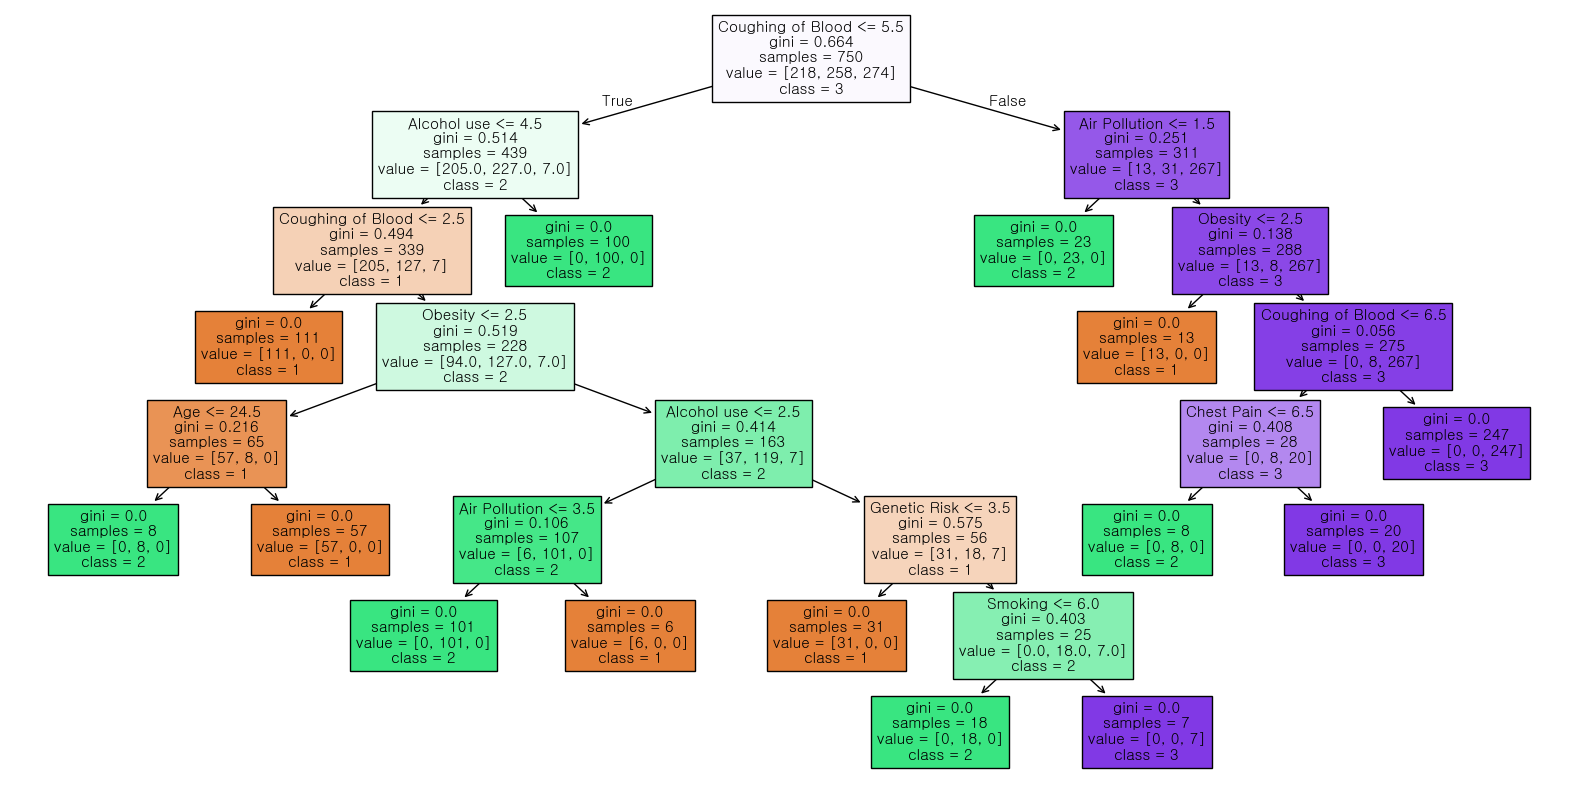

In [59]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(
    dt,
    filled=True,
    feature_names=X.columns,
    class_names=['1','2','3']
)
plt.show()

In [60]:
print(dt.feature_importances_)

[0.02818661 0.10006173 0.16551289 0.         0.         0.04439413
 0.         0.         0.12246455 0.02024986 0.         0.02295902
 0.49617121]


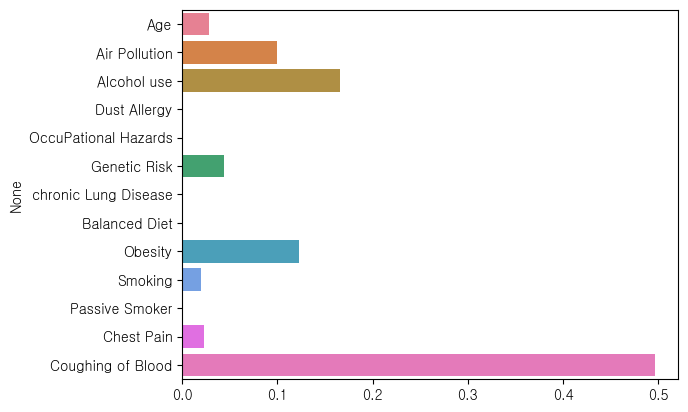

In [ ]:
sns.barplot(x=dt.feature_importances_, y=X.columns, hue=X.columns)
plt.show()
# eda에서 도출해낸 결과와 다를 수가 있나? 트리를 하나 가지고 예측한거라 random forest와 다르게 나올 수 있음!

### SVM

In [65]:
from sklearn.svm import SVC

rbf_model = SVC()
linear_model = SVC(kernel='linear')
poly_model = SVC(kernel='poly')

rbf_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)

rbf_score = rbf_model.score(X_test, y_test)
linear_score = linear_model.score(X_test, y_test)
poly_score = poly_model.score(X_test, y_test)

print('rbf:', rbf_score, 'linear:', linear_score, 'poly:', poly_score)

rbf: 0.796 linear: 0.964 poly: 0.844


In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 13), (250, 13), (750,), (250,))

In [ ]:
# 결정경계가 2차원이기 때문에 차원 관련 오류가 남 -> pca를 사용해 차원 축소 or feature 2개 선택
from sklearn.inspection import DecisionBoundaryDisplay

dbd = DecisionBoundaryDisplay.from_estimator(rbf_model, X_train, alpha=0.7) #? 알파 값

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', label='Training Data')
plt.show()

ValueError: n_features must be equal to 2. Got 13 instead.

In [189]:
# pca
from sklearn.decomposition import PCA

# rbf kernel
pca = PCA(n_components=2)  # 2차원으로 축소
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.fit_transform(X_test)

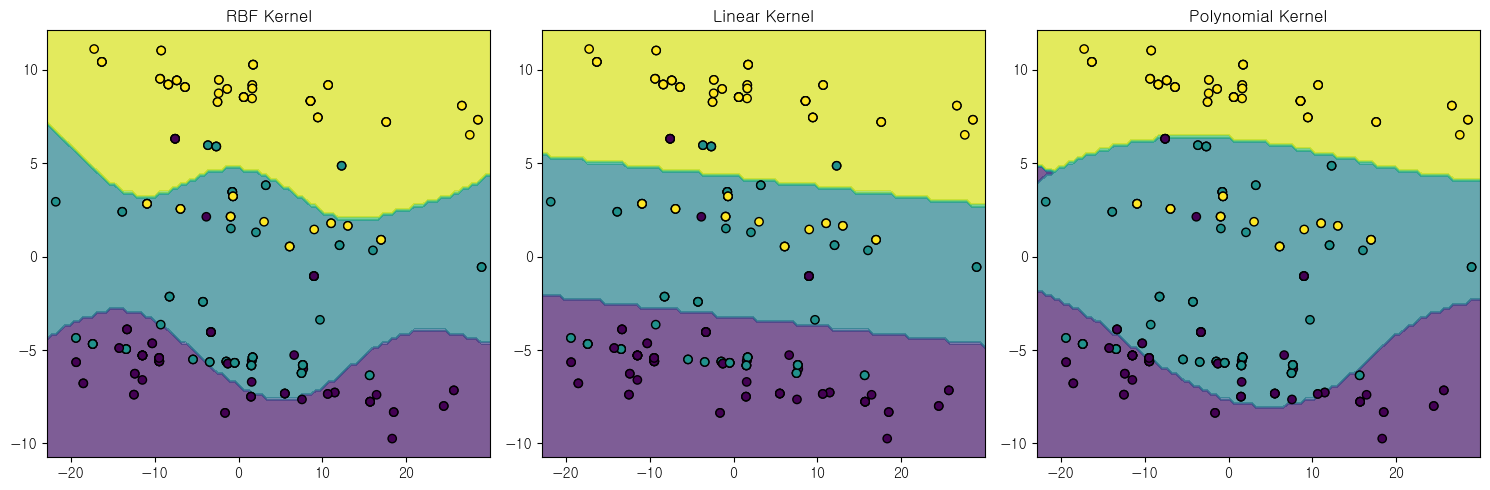

In [191]:
# 모델 학습
rbf_model.fit(X_train_2d, y_train)
linear_model.fit(X_train_2d, y_train)
poly_model.fit(X_train_2d, y_train)

# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 가로로 3개의 서브플롯 생성

models = [rbf_model, linear_model, poly_model]
titles = ["RBF Kernel", "Linear Kernel", "Polynomial Kernel"]

for ax, model, title in zip(axes, models, titles):
    dbd = DecisionBoundaryDisplay.from_estimator(model, X_test_2d, alpha=0.7, ax=ax)
    ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', label='Test Data')
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [192]:
for ax, model, title in zip(axes, models, titles):
    dbd = DecisionBoundaryDisplay.from_estimator(model, X_train_2d, alpha=0.7, ax=ax)
    ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', label='Training Data')
    ax.set_title(title)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

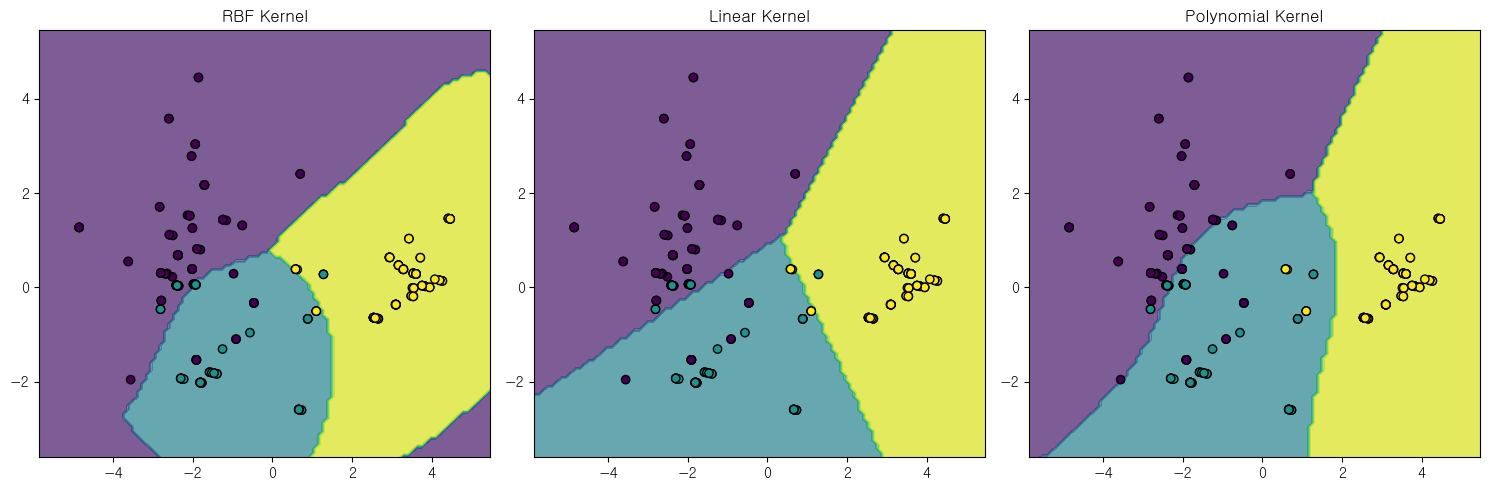

In [193]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA로 차원 축소
lda = LinearDiscriminantAnalysis(n_components=2)  # 2차원으로 축소
X_train_2d_lda = lda.fit_transform(X_train, y_train) 
X_test_2d_lda = lda.fit_transform(X_test, y_test)

# 모델 학습
rbf_model.fit(X_train_2d_lda, y_train)
linear_model.fit(X_train_2d_lda, y_train)
poly_model.fit(X_train_2d_lda, y_train)

# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 가로로 3개의 서브플롯 생성

models = rbf_model, linear_model, poly_model
titles = ["RBF Kernel", "Linear Kernel", "Polynomial Kernel"]

for ax, model, title in zip(axes, models, titles):
    dbd = DecisionBoundaryDisplay.from_estimator(model, X_test_2d_lda, alpha=0.7, ax=ax)
    ax.scatter(X_test_2d_lda[:, 0], X_test_2d_lda[:, 1], c=y_test, edgecolor='k', label='Test Data')
    ax.set_title(title)

plt.tight_layout()
plt.show()


---

## 앙상블

### Voting 

In [85]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [99]:
# hard voting
hard_voting = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('lr', lr),
        ('dt',dt)
    ]
)

hard_voting.fit(X_train, y_train)

y_pred_train = hard_voting.predict(X_train)
acc_score_train = accuracy_score(y_train, y_pred_train)
print('학습 점수: ', acc_score_train)

y_pred_test = hard_voting.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test)
print('테스트 점수: ', acc_score_test)

학습 점수:  0.9986666666666667
테스트 점수:  0.996


In [113]:
X_test.shape

(250, 13)

In [139]:
start, end = 0, 30
hard_voting_pred = hard_voting.predict(X_test[start:end]) # 30개만
print('앙상블 예측값: ', hard_voting_pred)

for classifier in [knn, lr, dt]:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, pred)

    class_name = classifier.__class__.__name__ 
    print('---------------')
    print(f'{class_name} 개별 정확도: {acc_score: .4f}')
    print(f'{class_name} 예측값: {pred[start:end]}')

앙상블 예측값:  [3 2 2 3 1 2 2 2 2 1 1 3 1 3 3 1 3 2 1 2 3 1 3 3 3 3 1 3 3 2]
---------------
KNeighborsClassifier 개별 정확도:  0.9840
KNeighborsClassifier 예측값: [3 2 2 3 1 2 2 2 2 1 1 3 1 3 3 1 3 2 1 2 3 1 3 3 3 3 1 3 3 2]
---------------
LogisticRegression 개별 정확도:  0.8320
LogisticRegression 예측값: [3 2 1 3 2 2 1 2 2 1 1 3 1 3 3 1 3 2 1 2 3 2 3 3 3 3 1 3 3 1]
---------------
DecisionTreeClassifier 개별 정확도:  1.0000
DecisionTreeClassifier 예측값: [3 2 2 3 1 2 2 2 2 1 1 3 1 3 3 1 3 2 1 2 3 1 3 3 3 3 1 3 3 2]


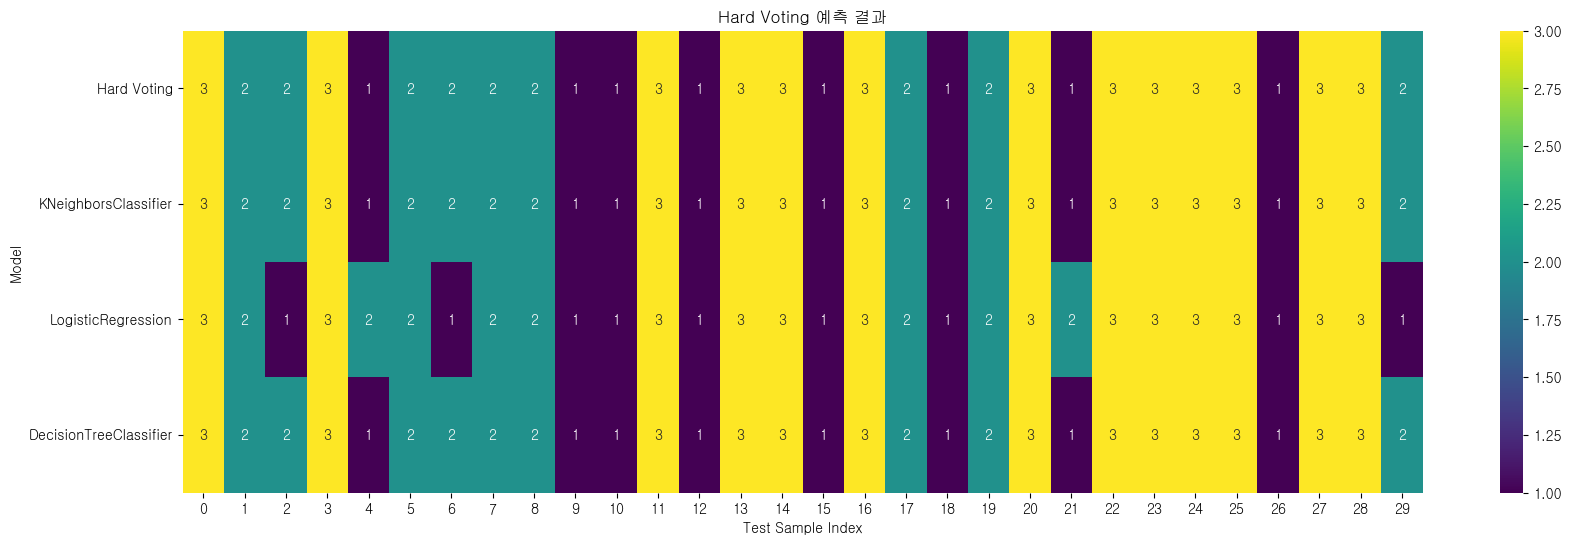

In [154]:
predictions = {"Hard Voting": hard_voting_pred}
for classifier in [knn, lr, dt]:
    predictions[classifier.__class__.__name__] = classifier.predict(X_test[start:end])

df = pd.DataFrame(predictions)

plt.figure(figsize=(20, 6))
sns.heatmap(df.T, annot=True, cmap="viridis", fmt=".0f")

plt.xlabel("Test Sample Index")
plt.ylabel("Model")
plt.title("Hard Voting 예측 결과")
plt.show()

In [146]:
# soft voting
soft_voting = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('lr', lr),
        ('dt',dt)
    ],
    voting='soft'
)

soft_voting.fit(X_train, y_train)

y_pred_train = soft_voting.predict(X_train)
acc_score_train = accuracy_score(y_train, y_pred_train)
print('학습 점수: ', acc_score_train)

y_pred_test = soft_voting.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test)
print('테스트 점수: ', acc_score_test)

학습 점수:  0.9986666666666667
테스트 점수:  0.996


In [147]:
# soft voting
start, end = 0, 30

soft_voting_pred_proba = soft_voting.predict_proba(X_test[start:end])
# print('앙상블 예측값: ', soft_voting_pred_proba)

averages = np.full_like(soft_voting_pred_proba, 0)

for classifier in [knn, lr, dt]:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, pred)
    pred_proba = classifier.predict_proba(X_test[start:end])

    averages += pred_proba

    class_name = classifier.__class__.__name__ 
    print('---------------')
    print(f'{class_name} 개별 정확도: {acc_score: .4f}')
    print(f'{class_name} 예측값: {pred[start:end]}')

---------------
KNeighborsClassifier 개별 정확도:  0.9840
KNeighborsClassifier 예측값: [3 2 2 3 1 2 2 2 2 1 1 3 1 3 3 1 3 2 1 2 3 1 3 3 3 3 1 3 3 2]
---------------
LogisticRegression 개별 정확도:  0.8320
LogisticRegression 예측값: [3 2 1 3 2 2 1 2 2 1 1 3 1 3 3 1 3 2 1 2 3 2 3 3 3 3 1 3 3 1]
---------------
DecisionTreeClassifier 개별 정확도:  1.0000
DecisionTreeClassifier 예측값: [3 2 2 3 1 2 2 2 2 1 1 3 1 3 3 1 3 2 1 2 3 1 3 3 3 3 1 3 3 2]


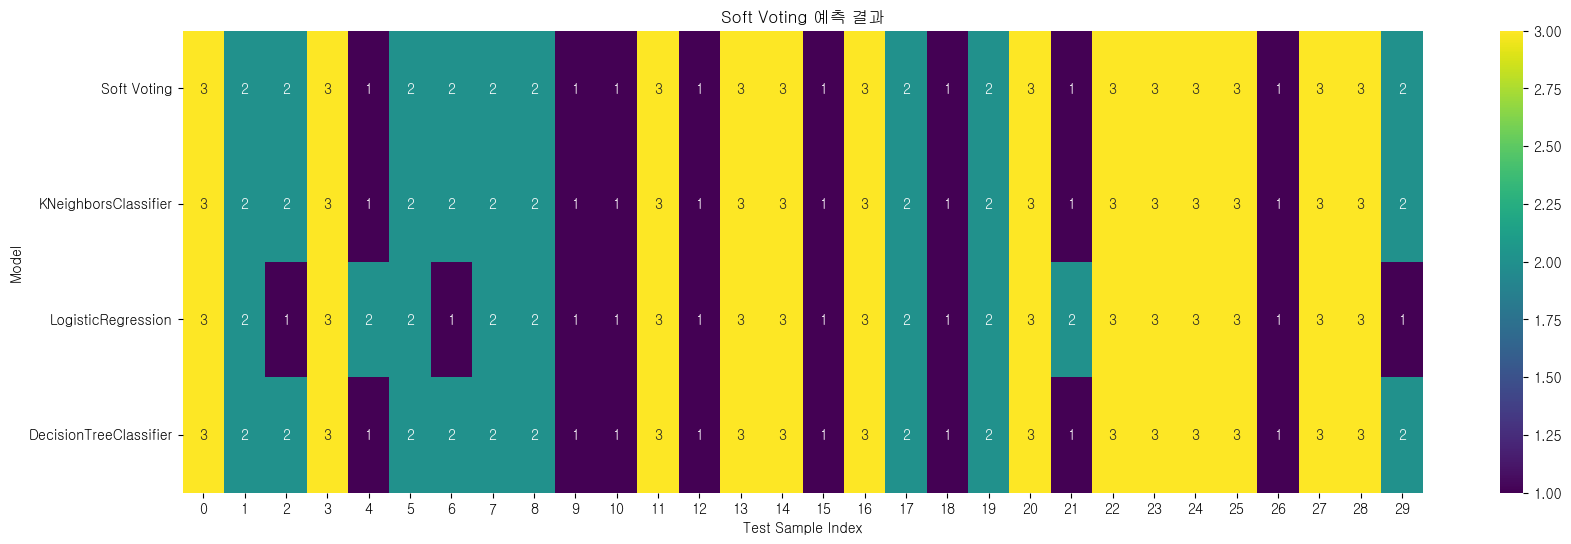

In [153]:
soft_voting_pred = np.argmax(soft_voting_pred_proba, axis=1) + 1 

predictions = {"Soft Voting": soft_voting_pred}
class_names = ["Soft Voting"]

for classifier in [knn, lr, dt]:
    pred = classifier.predict(X_test[start:end])
    predictions[classifier.__class__.__name__] = pred
    class_names.append(classifier.__class__.__name__)

df_predictions = pd.DataFrame(predictions, columns=class_names)

plt.figure(figsize=(20, 6))
sns.heatmap(df_predictions.T, annot=True, cmap="viridis", fmt=".0f")

plt.xlabel("Test Sample Index")
plt.ylabel("Model")
plt.title("Soft Voting 예측 결과")
plt.show()

---

### Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"랜덤 포레스트 정확도: {accuracy:.4f}")

# 상세 성능 지표 출력
print(classification_report(y_test, y_pred, target_names=['1','2','3']))

랜덤 포레스트 정확도: 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        91

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [164]:
y_pred_proba = rf_model.predict_proba(X_test[:5])  # 첫 5개 샘플
print(y_pred_proba)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


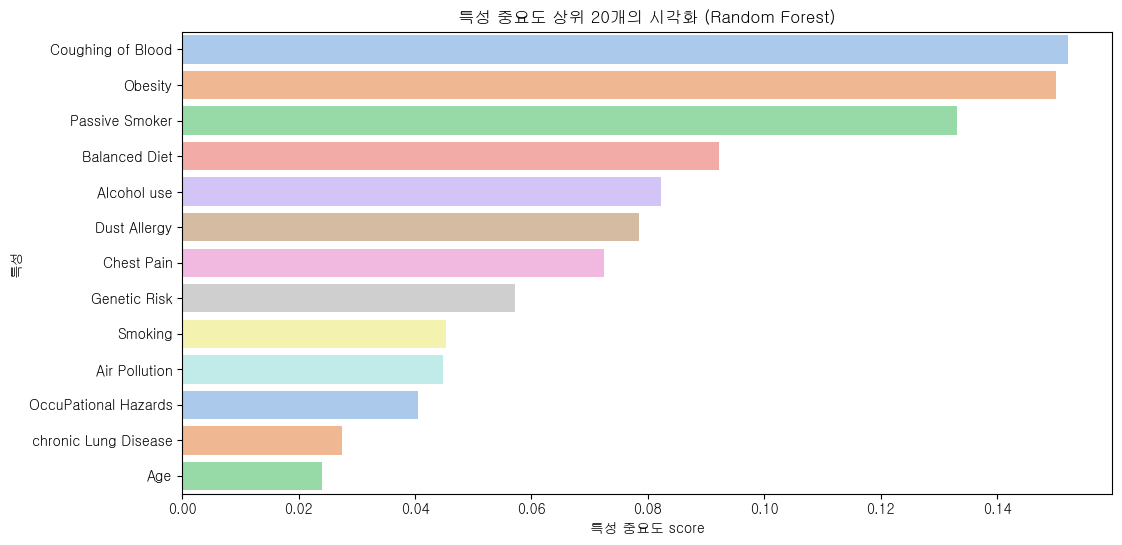

In [180]:
# 특성 중요도 추출
feature_importances = rf_model.feature_importances_

# 데이터프레임 생성 및 정렬
feat_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)  # 상위 20개

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_imp_df['Importance'], y=feat_imp_df['Feature'], palette="pastel")
plt.xlabel("특성 중요도 score")
plt.ylabel("특성")
plt.title("특성 중요도 상위 20개의 시각화 (Random Forest)")
plt.show()

---

### Boosting

##### Gradient Boosting

In [175]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.01
)

gb_clf.fit(X_train, y_train)

y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

print(f'학습 정확도: {accuracy_score(y_train, y_pred_train)}')
print(f'평가 정확도: {accuracy_score(y_test, y_pred_test)}')

학습 정확도: 0.972
평가 정확도: 0.96


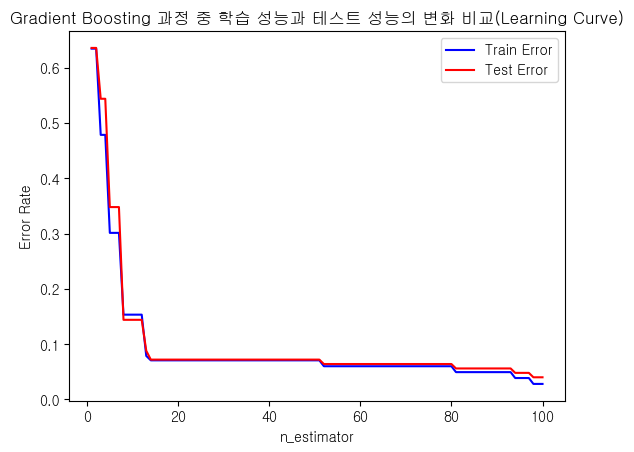

In [ ]:
# 모델의 수렴 과정
# 훈련 데이터에 비해 테스트 데이터가 높은 경우 과적합이 발생할 수 있음
# -> 모델이 훈련 데이터의 세부적인 요소까지 학습을 해서 train data의 error보다 test data의 error 비율이 높게 나옴
# -> 그래서 훈련데이터에 대한 과적합이 의심됨
# -> 교차검증을 해서 과적합을 줄이자

train_errors, test_errors = [], []

# 예측과 정확도 계산
for i in range(1, 101):
    gb_clf = GradientBoostingClassifier(n_estimators=i, learning_rate=0.01)
    gb_clf.fit(X_train, y_train)
    
    # 학습 및 테스트 오류 추적
    train_errors.append(1 - accuracy_score(y_train, gb_clf.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, gb_clf.predict(X_test)))

# 시각화
plt.plot(range(1, 101), train_errors, label="Train Error", color="blue")
plt.plot(range(1, 101), test_errors, label="Test Error", color="red")
plt.xlabel("n_estimator")
plt.ylabel("Error Rate")
plt.title("Gradient Boosting 과정 중 학습 성능과 테스트 성능의 변화 비교(Learning Curve)")
plt.legend()
plt.show()

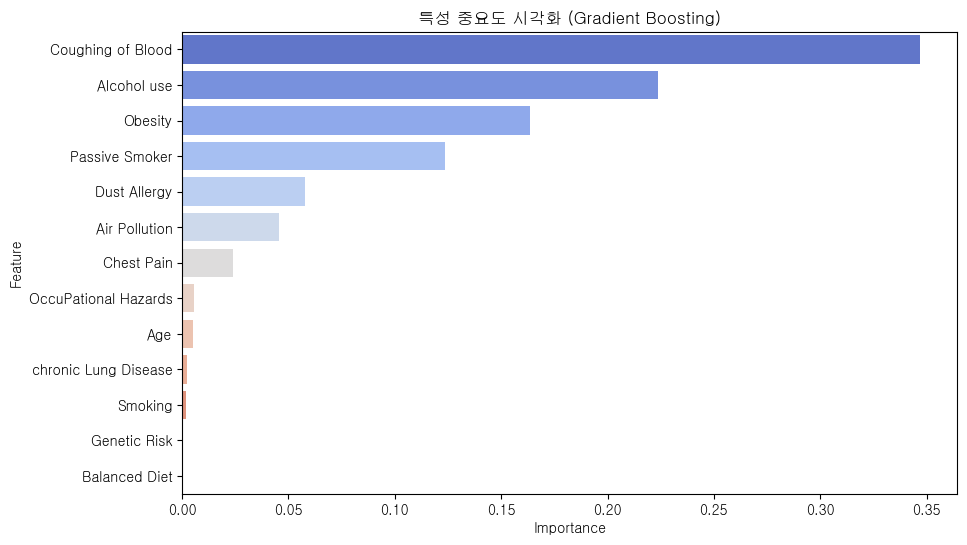

In [184]:
# 특성 중요도 추출
feature_importances = gb_clf.feature_importances_

feat_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette="coolwarm")
plt.title("특성 중요도 시각화 (Gradient Boosting)")
plt.show()